In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('/content/Amazon_Clothing_Sales_2025 DS12 - Amazon_Clothing_Sales_2025.csv')
df.head()

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,final_price,payment_method,review_rating,order_date,delivery_days,is_returned,region,customer_age_group,device_type
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,106.76,PayPal,3,2024-09-10,5.0,0,Midwest,25-34,Mobile
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,22.81,Gift Card,2,2025-06-25,8.0,0,West,25-34,Mobile
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,329.07,Gift Card,4,2025-01-08,5.0,0,Northeast,35-44,Mobile
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,12.05,Credit Card,5,2024-08-28,3.0,0,Midwest,45-54,Mobile
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,130.82,Credit Card,1,2024-11-12,5.0,0,NaN,45-54,Mobile


In [3]:
len(df)

25000

# Data Exploration and Cleaning

In [4]:
print(df.dtypes)

order_id               object
customer_id            object
product_id             object
product_name           object
main_category          object
sub_category           object
brand                  object
price                 float64
quantity                int64
discount_percent        int64
final_price           float64
payment_method         object
review_rating           int64
order_date             object
delivery_days         float64
is_returned             int64
region                 object
customer_age_group     object
device_type            object
dtype: object


In [5]:
df.order_date = pd.to_datetime(df.order_date,format="%Y-%m-%d")
df = df.dropna(subset=['order_date'])

In [6]:
print(df.order_date.dtypes)

datetime64[ns]


In [7]:
missing=df.isnull().sum()
missing_prct=(missing/len(df))*100
missing_prct = missing_prct[missing_prct > 0]
print(missing_prct)

brand                 5.0
price                 1.0
payment_method        5.0
delivery_days         1.0
region                5.0
customer_age_group    5.0
device_type           5.0
dtype: float64


In [8]:
num_col_Numbers=list(df.select_dtypes('number').columns)
print(f'The number type features in data are : \t {num_col_Numbers}')
num_col_object=list(df.select_dtypes('object').columns)
print(f'The object type features in data are : \t {num_col_object}')

The number type features in data are : 	 ['price', 'quantity', 'discount_percent', 'final_price', 'review_rating', 'delivery_days', 'is_returned']
The object type features in data are : 	 ['order_id', 'customer_id', 'product_id', 'product_name', 'main_category', 'sub_category', 'brand', 'payment_method', 'region', 'customer_age_group', 'device_type']


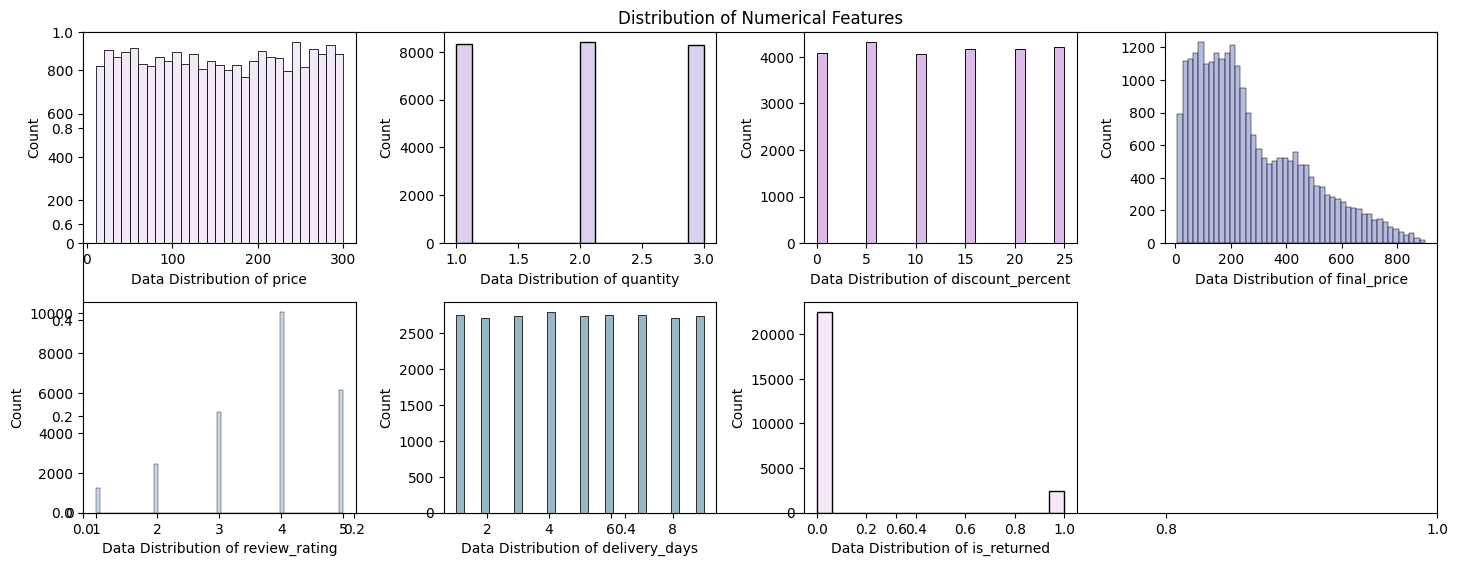

In [9]:
color_list = ['#f1e2f4','#CFC1E8', '#D4A5E3','#9CA3D6','#b7c9e2','#779eb2']
plt.figure(figsize=(15,6))
plt.title('Distribution of Numerical Features')
inx=1
for col in num_col_Numbers:
  colori = color_list[(inx - 1) % len(color_list)]
  plt.subplot(2,4,inx)
  sns.histplot(df[col],color=colori)
  plt.xlabel(f'Data Distribution of {col}')
  inx=inx+1

plt.tight_layout()
plt.show()

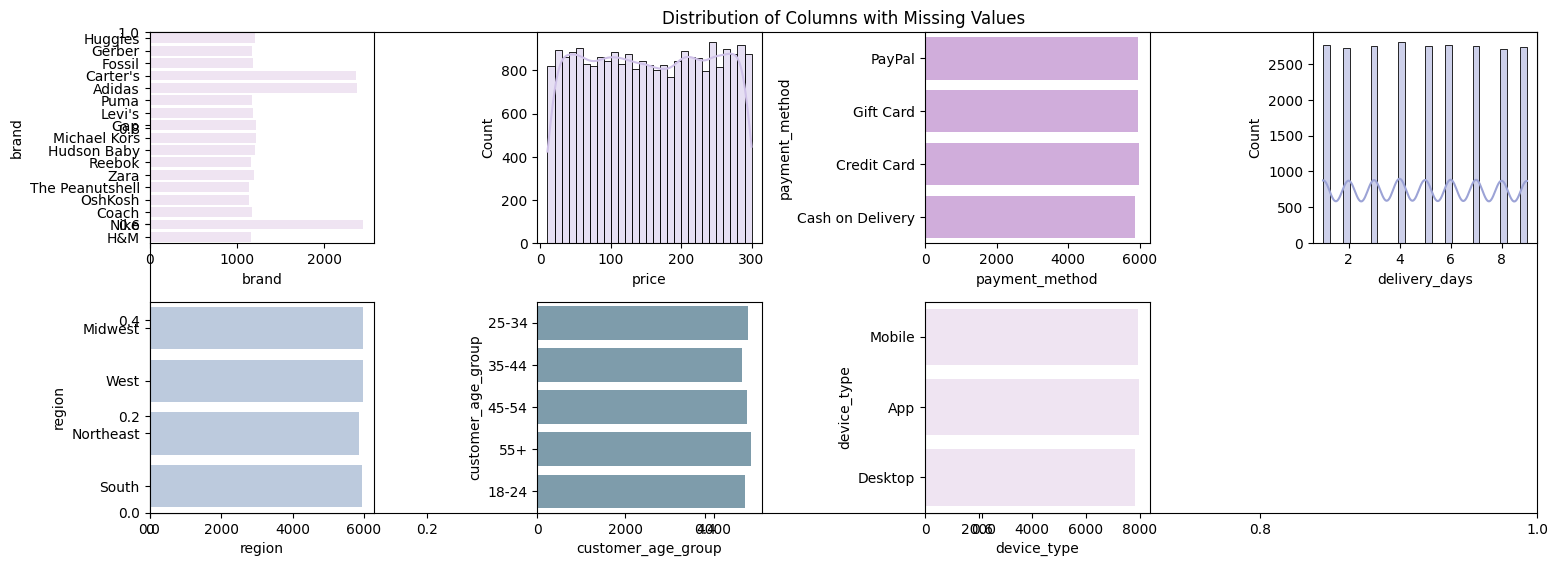

In [10]:
cols_with_missing = missing_prct.index

# Set up subplots (adjust size as needed)
plt.figure(figsize=(16, 6))
plt.title('Distribution of Columns with Missing Values')
i=1
for col in cols_with_missing:
  plt.subplot(2, 4, i)
  colori = color_list[(i - 1) % len(color_list)]
  if pd.api.types.is_numeric_dtype(df[col]):
    sns.histplot(df[col], kde=True,color=colori)
  else:
    sns.countplot(df[col],color=colori)
    plt.xlabel(col)
  i=i+1

plt.tight_layout()
plt.show()

In [11]:
# since no column is skewed, Fill na values with mean (numerical dtype)
for col in cols_with_missing:
  if pd.api.types.is_numeric_dtype(df[col]):
    df[col] = df[col].fillna(df[col].mean())
  else:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
df.isnull().sum()

,0
order_id,0
customer_id,0
product_id,0
product_name,0
main_category,0
sub_category,0
brand,0
price,0
quantity,0
discount_percent,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df['final_price_calc'] = df['price'] * (1-df['discount_percent']/100)

df['isconsistent_price'] = df['final_price'] - df['final_price_calc']

The final price is not consistent with the discounted percentage.

It is evident from the histograms of numericalcolumns that there are no outliers in the data.

# Feature Engineering

In [15]:
df['order_year'] = df.order_date.dt.year.astype(int)
df['order_month'] = df.order_date.dt.month.astype(int)
df['order_week'] = df.order_date.dt.weekday.astype(int)

In [16]:
df['discounted'] = df['price']*df['discount_percent']/100
df['unit_price'] = df['final_price']/df['quantity']

In [17]:
df['delivery_days'].value_counts()

,count
delivery_days,
4.000000,2805
1.000000,2764
6.000000,2761
7.000000,2757
5.000000,2747
3.000000,2744
9.000000,2739
2.000000,2718
8.000000,2715


Delivery days should be an int, not a float

In [18]:
df['delivery_days'] = df['delivery_days'].round().astype(int)

In [19]:
'''
Flag delivery as fast or slow based on delivery days
if days > 5 slow
else fast
'''
df['delivery_status'] = df['delivery_days'].apply(lambda x: 'slow' if x > 5 else 'fast')

In [20]:
customer_summary=df.groupby(['customer_id']).agg({
    'final_price':'sum',
    'order_id':'count',
    'review_rating':'mean',
    'is_returned':'count'
}).rename(columns={'final_price':'Total spend','order_id':'Total orders','review_rating':'Average rating','is_returned':'total_returned'})
display(customer_summary)

,Total spend,Total orders,Average rating,total_returned
customer_id,,,,
0000A5486A60,565.98,1,2.0,1
000128A482A9,343.10,1,3.0,1
0006310A3377,203.02,1,5.0,1
00069A393862,541.82,1,3.0,1
00070A643221,86.88,1,4.0,1
...,...,...,...,...
AAA992357434,159.62,1,3.0,1
AAAA33688A18,112.50,1,4.0,1
AAAA437A5312,79.60,1,3.0,1


# Univariate Analysis

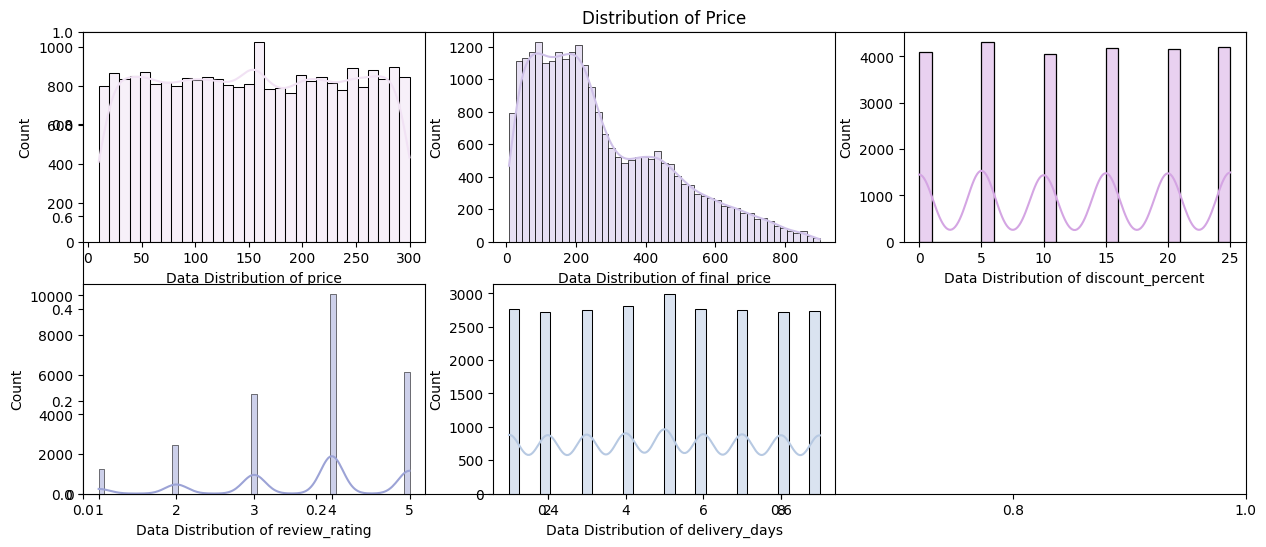

In [21]:
# Univariate Analysis of Price
plt.figure(figsize=(15,6))
plt.title('Distribution of Price')
df_price=df[['price', 'final_price', 'discount_percent', 'review_rating', 'delivery_days']]
inx=1
for col in df_price.columns:
  color = color_list[(inx - 1) % len(color_list)]  # Loop through color
  plt.subplot(2,3,inx)
  sns.histplot(df_price[col],color=color,kde=True)
  plt.xlabel(f'Data Distribution of {col}')
  inx=inx+1

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            25000 non-null  object        
 1   customer_id         25000 non-null  object        
 2   product_id          25000 non-null  object        
 3   product_name        25000 non-null  object        
 4   main_category       25000 non-null  object        
 5   sub_category        25000 non-null  object        
 6   brand               25000 non-null  object        
 7   price               25000 non-null  float64       
 8   quantity            25000 non-null  int64         
 9   discount_percent    25000 non-null  int64         
 10  final_price         25000 non-null  float64       
 11  payment_method      25000 non-null  object        
 12  review_rating       25000 non-null  int64         
 13  order_date          25000 non-null  datetime64

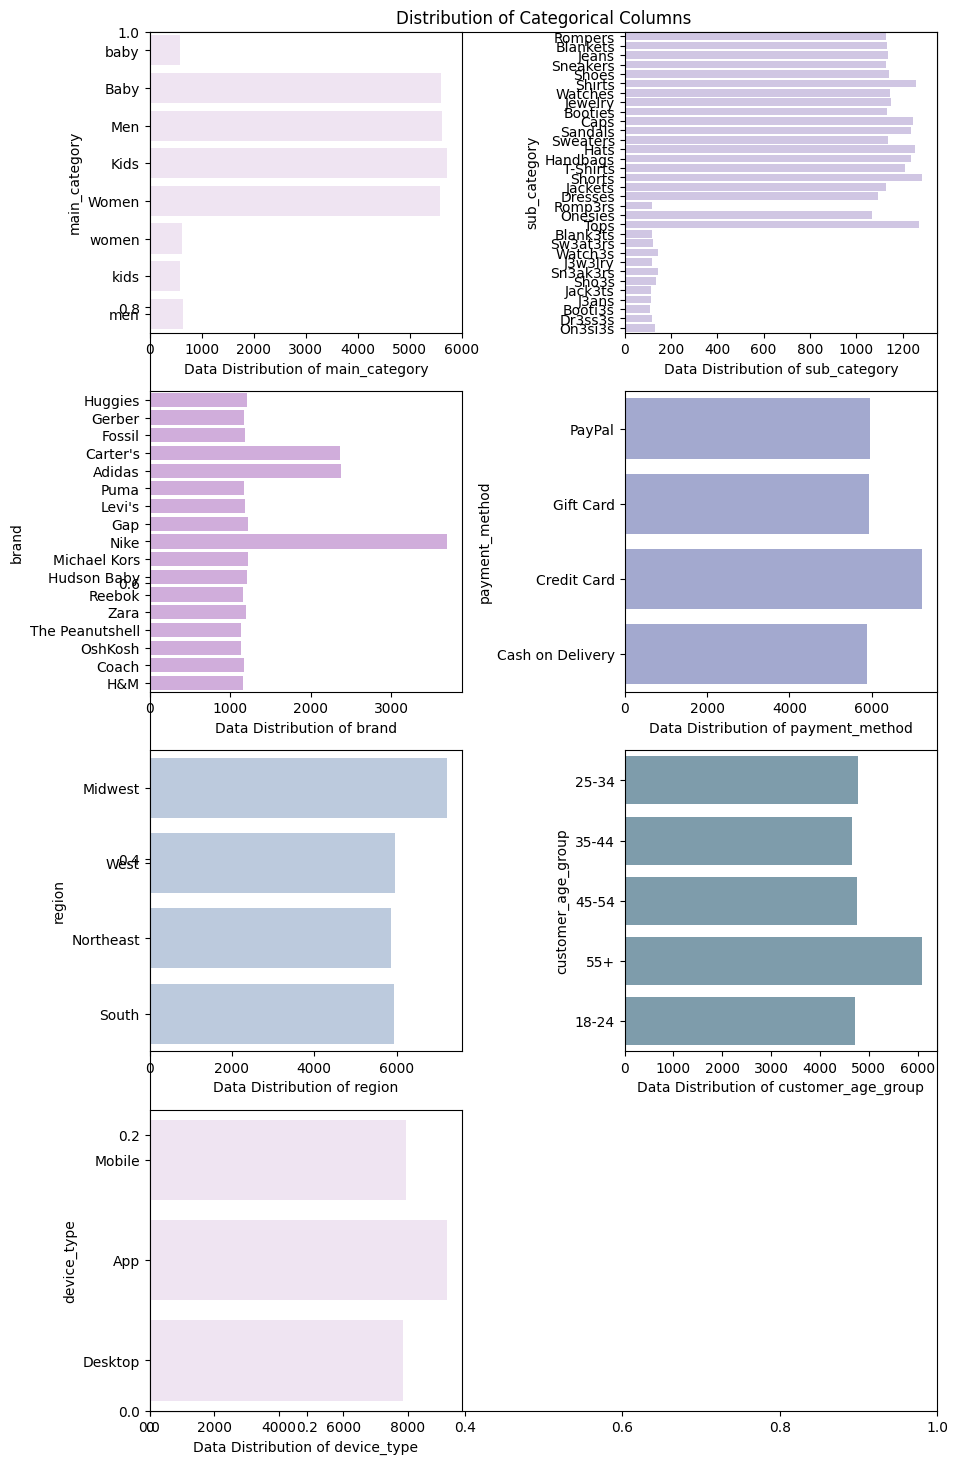

In [23]:
# Univariate Analysis of Categorical Columns
plt.figure(figsize=(10,15))
plt.title('Distribution of Categorical Columns')
df_categorical=df[['main_category', 'sub_category', 'brand', 'payment_method', 'region', 'customer_age_group', 'device_type']]
inx=1
for col in df_categorical.columns:
  colori = color_list[(inx - 1) % len(color_list)]  # Loop through color
  plt.subplot(4,2,inx)
  sns.countplot(df_categorical[col],color=colori)
  plt.xlabel(f'Data Distribution of {col}')
  inx=inx+1

plt.tight_layout()
plt.show()

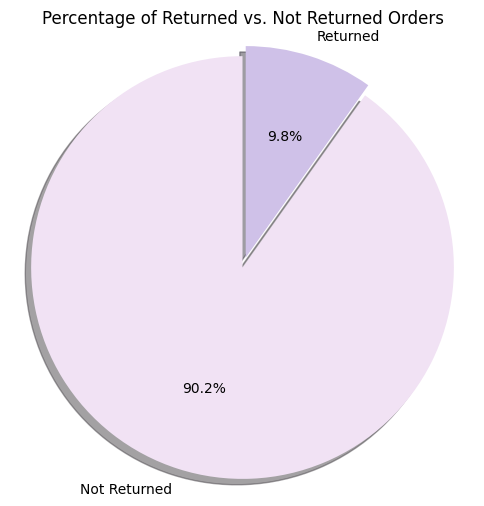

In [24]:
return_counts = df['is_returned'].value_counts()
labels = ['Not Returned', 'Returned']

plt.figure(figsize=(6, 6))
plt.pie(
    return_counts,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,
    colors=color_list,
    explode=(0.05, 0),
    shadow=True
)

plt.title('Percentage of Returned vs. Not Returned Orders')
plt.axis('equal')
plt.show()

# Bivariate & Multivariate Analysis


In [25]:
df.head()

,order_id,customer_id,product_id,product_name,main_category,sub_category,brand,price,quantity,discount_percent,...,customer_age_group,device_type,final_price_calc,isconsistent_price,order_year,order_month,order_week,discounted,unit_price,delivery_status
0,#HLWTRIGAJB0RFL,A86556872001,6Q3V14RXRF,Huggies Rompers,baby,Rompers,Huggies,118.62,1,10,...,25-34,Mobile,106.758,0.002,2024,9,1,11.862,106.760,fast
1,#9LMWG6T6H0IPE0,0A9218115AAA,33MRMEM3WN,Gerber Blankets,Baby,Blankets,Gerber,26.84,1,15,...,25-34,Mobile,22.814,-0.004,2025,6,2,4.026,22.810,slow
2,#Q6J5C5621SSE5V,8A5A09200074,E674NZH16V,Fossil Jeans,Men,Jeans,Fossil,219.38,2,25,...,35-44,Mobile,164.535,164.535,2025,1,2,54.845,164.535,fast
3,#J145DOUKB5RVBN,97602786977A,ETMIXJHFAT,Carter's Rompers,Baby,Rompers,Carter's,12.05,1,0,...,45-54,Mobile,12.050,0.000,2024,8,2,0.000,12.050,fast
4,#7ZXNMSUU22AK4J,744297746010,5BYOWYYY5P,Adidas Sneakers,Kids,Sneakers,Adidas,145.36,1,10,...,45-54,Mobile,130.824,-0.004,2024,11,1,14.536,130.820,fast


In [26]:
df['order_week'].value_counts()

,count
order_week,
0,3653
5,3614
1,3602
3,3569
2,3568
4,3516
6,3478


In [27]:
monthly_revenue = df.groupby(['order_year','order_month'])['final_price'].sum().reset_index()
monthly_revenue

,order_year,order_month,final_price
0,2024,7,579775.00
1,2024,8,555984.18
2,2024,9,585853.10
3,2024,10,560576.79
4,2024,11,571213.13
5,2024,12,569000.84
6,2025,1,574091.72
7,2025,2,502790.32
8,2025,3,600881.50
9,2025,4,573181.85


Text(0, 0.5, 'Revenue')

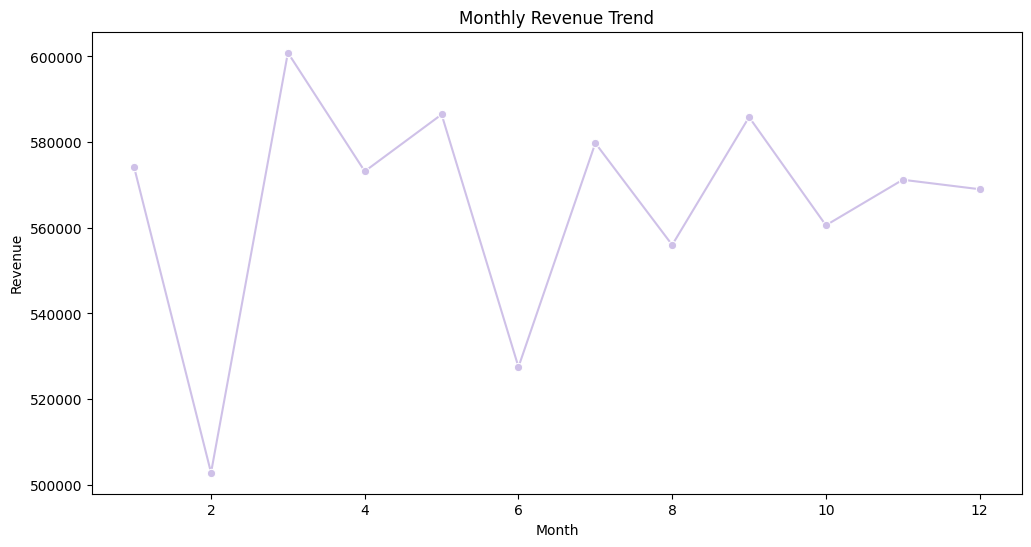

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='order_month', y='final_price', marker='o',color=color_list[1])
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')

In [29]:
weekly_revenue = df.groupby(['order_month','order_week'])['final_price'].sum().reset_index()

In [30]:
weekly_revenue

,order_month,order_week,final_price
0,1,0,73045.64
1,1,1,76041.43
2,1,2,82465.07
3,1,3,102231.31
4,1,4,90987.86
...,...,...,...
79,12,2,69971.43
80,12,3,70560.05
81,12,4,77144.46
82,12,5,74367.57


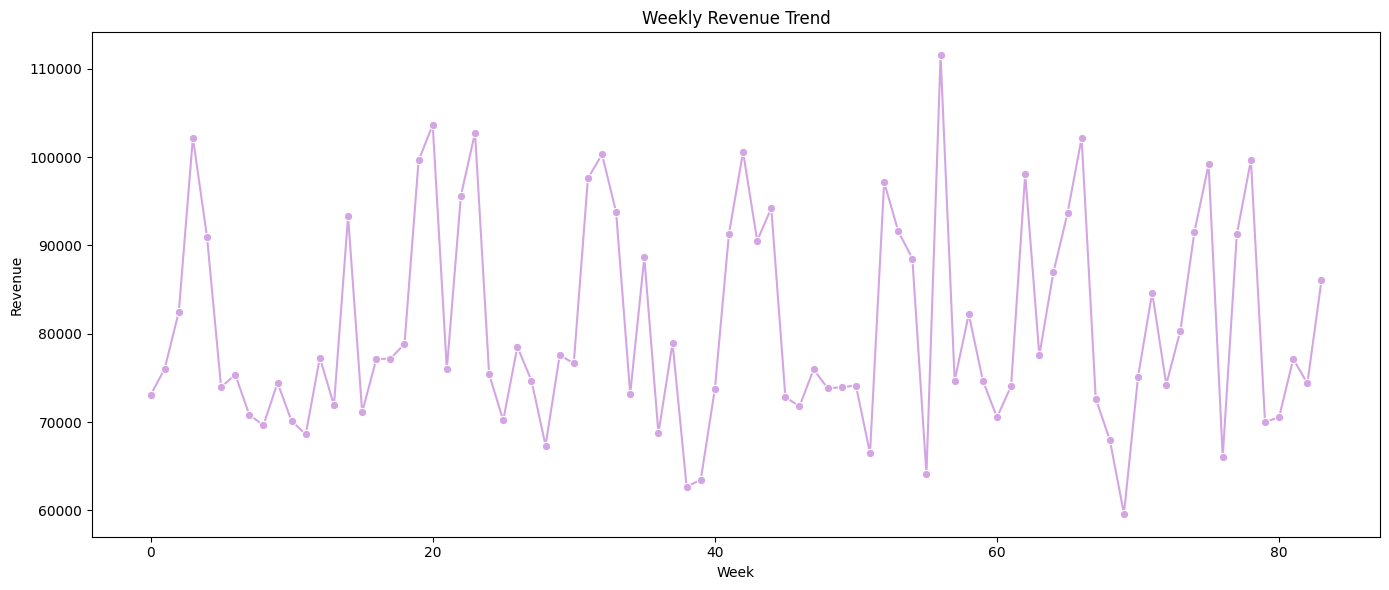

In [31]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_revenue,x=weekly_revenue.index, y='final_price', marker='o',color='#D4A5E3')

plt.title('Weekly Revenue Trend')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

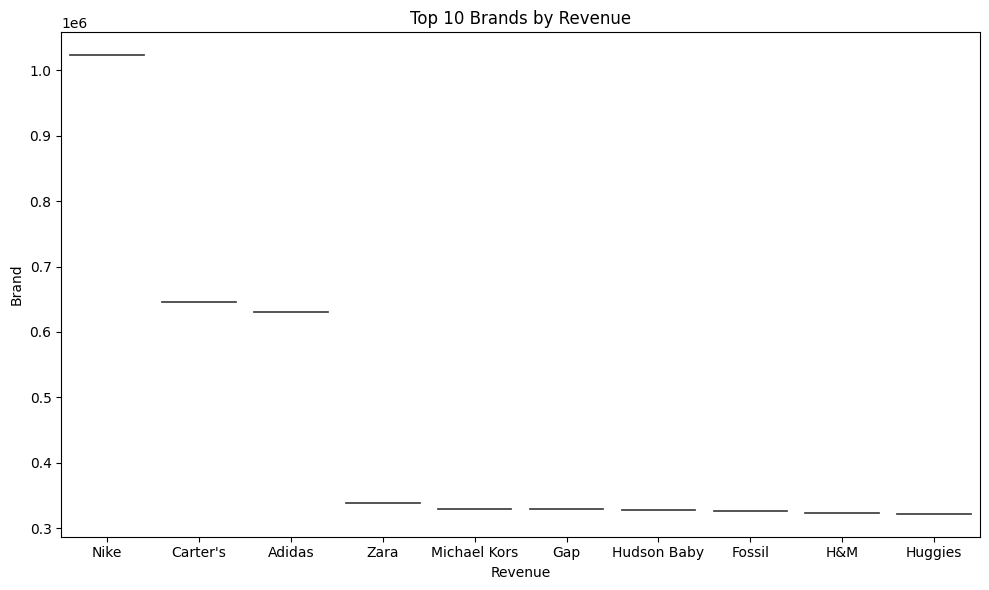

In [32]:
brand_revenue = df.groupby('brand')['final_price'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(10, 6))
bars=sns.violinplot(data=brand_revenue,x='brand',y='final_price')
plt.title('Top 10 Brands by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


In [33]:
category_revenue = df.groupby(['main_category','sub_category'])['final_price'].sum().sort_values(ascending=False).reset_index().head(10)


In [34]:
category_revenue['category']=category_revenue['main_category']+' '+category_revenue['sub_category']
category_revenue.drop(columns=['main_category','sub_category'],inplace=True)
category_revenue

,final_price,category
0,314275.60,Kids Shorts
1,308818.33,Kids Shirts
2,308522.09,Women Tops
3,305801.13,Baby Hats
4,304286.34,Kids Caps
5,302743.15,Men T-Shirts
6,302052.34,Women Handbags
7,296150.54,Women Sandals
8,294231.78,Women Jewelry
9,281531.92,Kids Sneakers


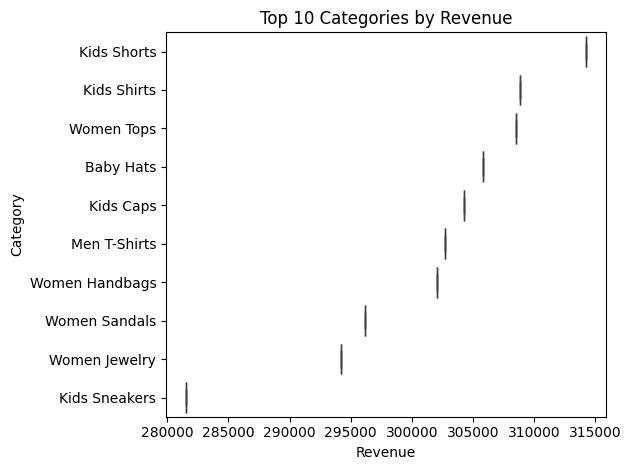

In [35]:
bars=sns.boxplot(data=category_revenue,x='final_price', y='category')
plt.title('Top 10 Categories by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

/tmp/ipython-input-33727669.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(data=df,x='final_price',y='discount_percent',size='quantity',hue='quantity',palette=color_list)


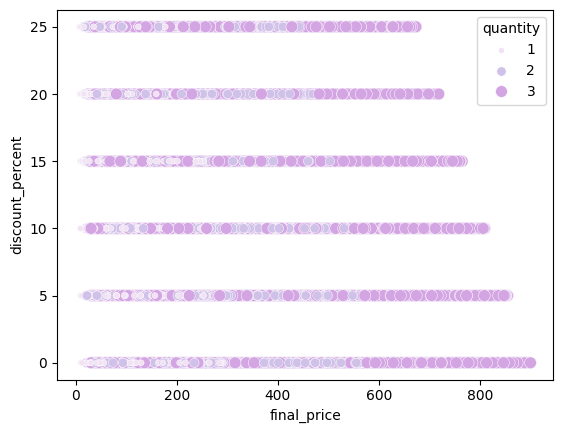

In [36]:
sns.scatterplot(data=df,x='final_price',y='discount_percent',size='quantity',hue='quantity',palette=color_list)
plt.show()

The scatter plot between final price and discount percentage indicates that increase in price does not affect the quantity in which the product is bought as it is a flat line and has no negative or positive slope. For a higher discount rate, the maximum price is less than with lower or no discount. The price range of 600 and above only occures when 3 items are bought. There are no exceptionally high priced item in the data.

In [37]:
df_returnrate=df[['main_category','brand','customer_age_group','device_type']]


In [38]:
df_returnrate.head()

,main_category,brand,customer_age_group,device_type
0,baby,Huggies,25-34,Mobile
1,Baby,Gerber,25-34,Mobile
2,Men,Fossil,35-44,Mobile
3,Baby,Carter's,45-54,Mobile
4,Kids,Adidas,45-54,Mobile


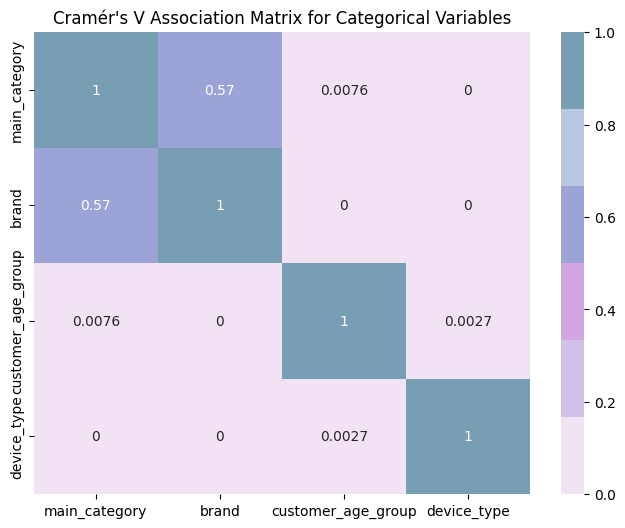

In [39]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute the Cramér's V matrix
cols = df_returnrate.columns
cramers_results = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

for col1 in cols:
    for col2 in cols:
        cramers_results.loc[col1, col2] = cramers_v(df_returnrate[col1], df_returnrate[col2])

# Plot as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_results, annot=True, cmap=color_list, vmin=0, vmax=1)
plt.title("Cramér's V Association Matrix for Categorical Variables")
plt.show()

In [40]:
returnrate_summary=df.groupby(['is_returned']).agg({
    'main_category':'count',
    'brand':'count',
    'customer_age_group':'count',
    'device_type':'count'
})
display(returnrate_summary)

,main_category,brand,customer_age_group,device_type
is_returned,,,,
0,22539,22539,22539,22539
1,2461,2461,2461,2461


In [41]:
df.customer_id.duplicated().sum()

np.int64(0)

All the customers are one time only.

In [42]:
revenew_region = df.groupby('region')['final_price'].sum()
region_order =df.groupby('region')['order_id'].nunique()
aov=revenew_region/region_order
print(aov)

region
Midwest      271.682386
Northeast    274.334741
South        271.386894
West         268.567180
dtype: float64


In [43]:
revenew_age = df.groupby('customer_age_group')['final_price'].sum()
age_order =df.groupby('customer_age_group')['order_id'].nunique()
aov_age=revenew_age/age_order
print(aov_age)

customer_age_group
18-24    277.328573
25-34    274.464765
35-44    268.324251
45-54    267.671849
55+      270.046965
dtype: float64


/tmp/ipython-input-775773249.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='delivery_days', y='review_rating',palette=color_list)
/tmp/ipython-input-775773249.py:1: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='delivery_days', y='review_rating',palette=color_list)


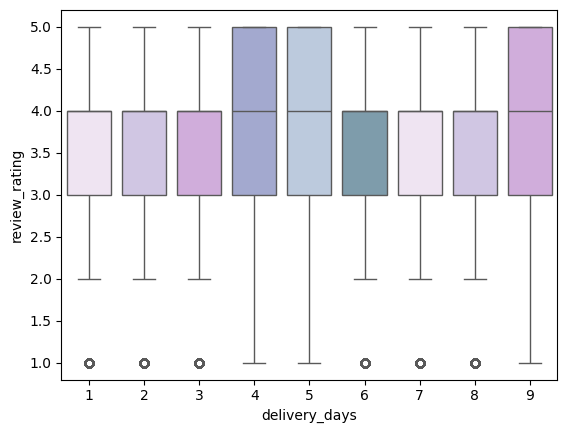

In [44]:
sns.boxplot(data=df, x='delivery_days', y='review_rating',palette=color_list)
plt.show()

/tmp/ipython-input-194984912.py:9: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(


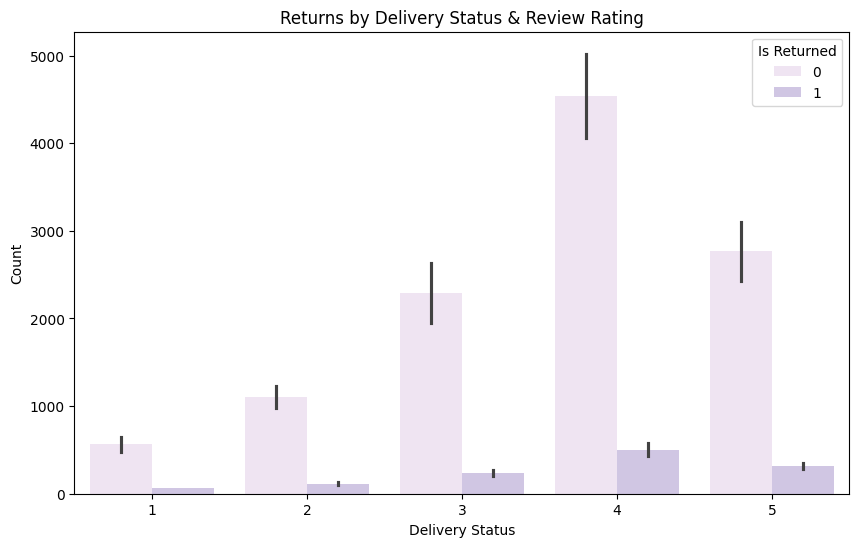

In [45]:
df_deliveryperf = (
    df.groupby(['delivery_status', 'review_rating'])['is_returned']
      .value_counts()
      .reset_index(name='count')
)

# Plot grouped bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_deliveryperf,
    x='review_rating',
    y='count',
    hue='is_returned',
    palette=color_list
)

plt.title('Returns by Delivery Status & Review Rating')
plt.ylabel('Count')
plt.xlabel('Delivery Status')
plt.legend(title='Is Returned')
plt.show()

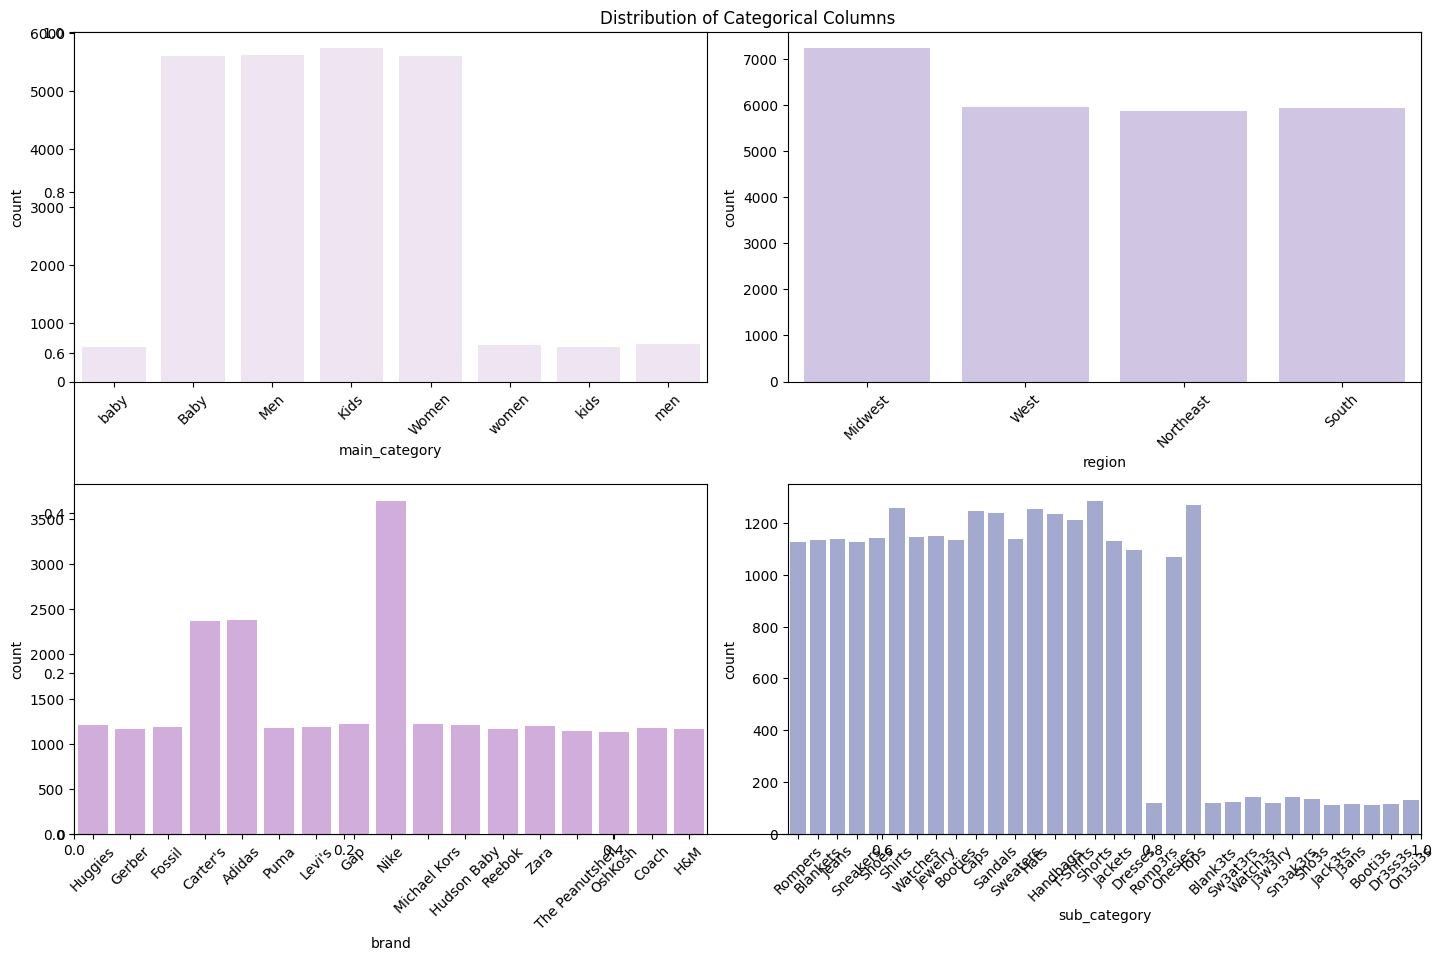

In [46]:
plt.figure(figsize=(15,10))
plt.title('Distribution of Categorical Columns')
list_cat=['main_category','region','brand','sub_category']
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.countplot(data=df,x=list_cat[i],color=color_list[i])
  plt.xticks(rotation=45)

plt.tight_layout()

In [47]:
df_deliveryperf.sort_values(by='review_rating').head(8)

,delivery_status,review_rating,is_returned,count
0,fast,1,0,650
1,fast,1,1,66
10,slow,1,0,478
11,slow,1,1,60
12,slow,2,0,984
13,slow,2,1,97
2,fast,2,0,1235
3,fast,2,1,133


In [48]:
df_payment = (
    df.groupby(['payment_method','is_returned']).agg({
     'final_price':'mean',
     'is_returned':'count'
    }).rename(columns={'final_price': 'Average_spent','is_returned':'count'})
)

In [49]:
df_payment

Average_spent  count
payment_method   is_returned                      
Cash on Delivery 0               272.145978   5353
                 1               273.471109    523
Credit Card      0               270.991604   6520
                 1               266.614638    705
Gift Card        0               273.096600   5311
                 1               272.792973    629
PayPal           0               271.564181   5355
                 1               258.965066    604

The average spent is approximately equal along all delivery methods. Hence the payment method does not affect the average spent by a customer. The 'Credit card' has maximum returns i.e 705. However, there is no huge difference in return as compared to total orders.Approximately 89 % of orders are not returned for giftcard and paypal. Approximately 90 % of orders are not returned for cash on delivery and credit card.

In [50]:
return_rate_device = df.groupby('device_type')['is_returned'].mean().reset_index(name='return_rate')

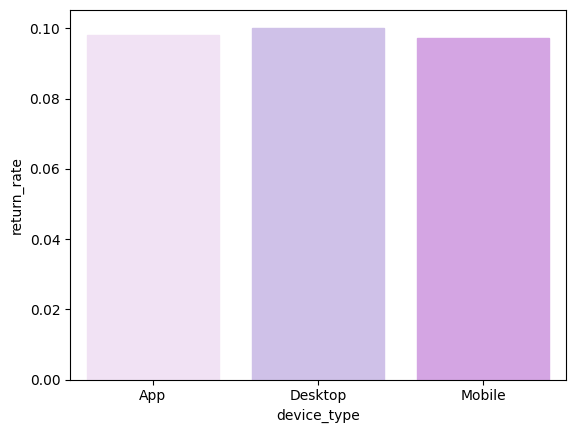

In [51]:
bars=sns.barplot(data=return_rate_device, x='device_type', y='return_rate')
colors = (color_list* (len(category_revenue) // len(color_list) + 1))[:len(category_revenue)]
for bar, color in zip(bars.patches, colors):
    bar.set_color(color)


/tmp/ipython-input-236643337.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.catplot(


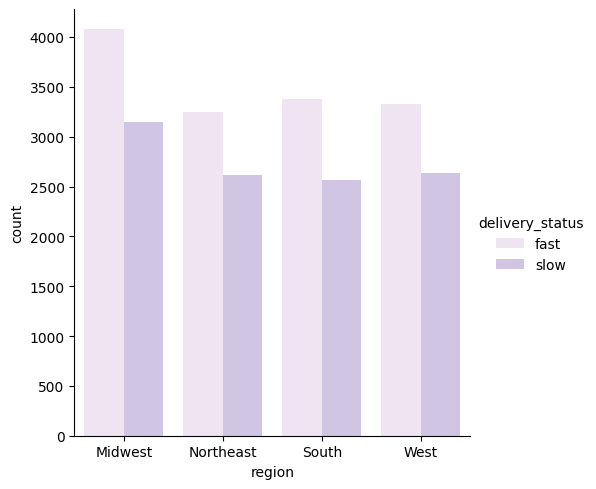

In [52]:
region_delivery = (
    df.groupby(['region', 'delivery_status'])['order_id']
    .count()
    .reset_index(name='count')
)

sns.catplot(
    data=region_delivery, kind='bar',
    x='region', y='count', hue='delivery_status',palette=color_list
)

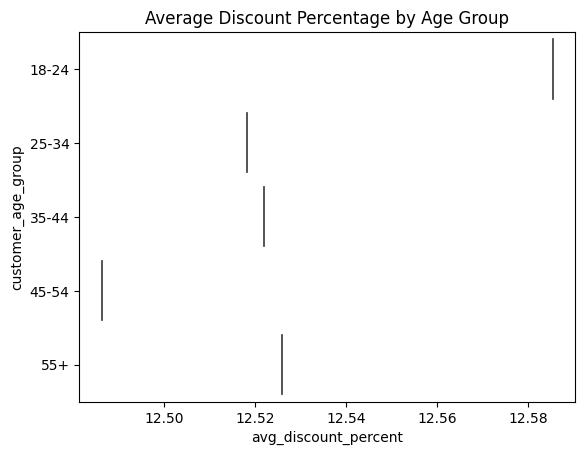

In [53]:
age_discount = (
    df.groupby('customer_age_group')['discount_percent']
    .mean()
    .reset_index(name='avg_discount_percent')
)

sns.violinplot(data=age_discount, x='avg_discount_percent', y='customer_age_group')
plt.title('Average Discount Percentage by Age Group')
plt.show()

In [54]:
age_discount

,customer_age_group,avg_discount_percent
0,18-24,12.585475
1,25-34,12.518286
2,35-44,12.522029
3,45-54,12.486327
4,55+,12.525824


# Hypothesis

**Higher discounts lead to higher quantity sold but also higher return rates**

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Latest purchase date for recency
snapshot_date = df['order_date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'order_id': 'nunique',  # Frequency
    'final_price': 'sum',   # Monetary
    'is_returned': 'mean',  # Return rate
    'review_rating': 'mean' # Avg rating
}).reset_index()

df.groupby('discount_percent').agg({
    'quantity': 'sum',
    'is_returned': 'mean'
}).reset_index().sort_values('discount_percent')

,discount_percent,quantity,is_returned
0,0,8191,0.095669
1,5,8616,0.104471
2,10,8132,0.098247
3,15,8279,0.095638
4,20,8325,0.099928
5,25,8442,0.096437


Low discounts (5%) drive the most sales but also the highest returns where as moderate discounts (20-25%) still boost sales without a major spike in returns.10% discounts perform poorly—lower sales and higher returns than 15% or 25%.

**Longer delivery times negatively impact review ratings and increase returns.**

In [56]:
df.groupby('delivery_days').agg({
    'review_rating': 'mean',
    'is_returned': 'mean'
}).reset_index().sort_values('delivery_days')

,delivery_days,review_rating,is_returned
0,1,3.676556,0.106729
1,2,3.696100,0.084989
2,3,3.673105,0.091837
3,4,3.724064,0.098039
4,5,3.683684,0.111778
5,6,3.705179,0.103948
6,7,3.700036,0.097207
7,8,3.687293,0.101289
8,9,3.737130,0.088719


The claim that "longer delivery times negatively impact review ratings" isn't strongly supported by this data. Ratings remain relatively stable across delivery times.

The return rate does spike at 5 days, but it's not consistently worse for longer deliveries (e.g., 9-day deliveries have a lower return rate than 5-day ones).

**Certain age groups (e.g., 25–34) have higher average order values**

In [57]:
print(age_order)

customer_age_group
18-24    4709
25-34    4785
35-44    4653
45-54    4754
55+      6099
Name: order_id, dtype: int64


The average order is different for different age groups. 55+ age group has highest average orders as compared to other,the age groups 35-44 have the lowest orders.

**Customers ordering from specific regions have systematically different return behavior**

In [58]:
df_midwest=df[df['region']=='Midwest']
df_northeast=df[df['region']=='Northeast']
df_south=df[df['region']=='South']
df_west=df[df['region']=='West']
print(len(df_midwest.query('is_returned==1'))/len(df_midwest))
print(len(df_west.query('is_returned==1'))/len(df_west))
print(len(df_south.query('is_returned==1'))/len(df_south))
print(len(df_northeast.query('is_returned==1'))/len(df_northeast))

0.10195047724443215
0.09828916470982892
0.09998316781686585
0.09270620313565099


There is no impact of region on Return Rate. The return rate across all regions is almost similar with midwest being highest(0.10) and north east being slightly lowest(0.092).

**Mobile shoppers behave differently in terms of average spend or returns compared to desktop**

In [59]:
df.groupby(['device_type','is_returned']).agg({
    'final_price': 'mean'
}).rename(columns={'final_price': 'Average_spent'}).sort_values('device_type')

Average_spent
device_type is_returned               
App         0               270.554752
            1               275.164414
Desktop     0               277.275497
            1               261.200916
Mobile      0               268.160472
            1               265.807834

Desktop shoppers without returns have the highest average spend (277.28), followed closely by App users (270.55) and Mobile users (268.16).

When orders are returned, App users spend slightly more on average (275.16) than Mobile (265.81) and Desktop (261.20).

This indicates Desktop shoppers tend to spend more when purchases are kept, while App users maintain relatively high spend even for returned orders.
Mobile users show the smallest variation in spend between kept and returned orders, suggesting a more consistent spending pattern.

**Premium brands (e.g., Nike) have lower return rates despite higher prices**

In [60]:
df.groupby('brand').agg({
    'is_returned': 'mean',
    'final_price': 'mean'
}).rename(columns={'final_price': 'Average_spent'}).sort_values('is_returned')

,is_returned,Average_spent
brand,,
Carter's,0.088223,272.267991
Hudson Baby,0.088503,271.532333
OshKosh,0.091711,278.863757
Coach,0.092451,271.624741
Reebok,0.092545,267.967755
Michael Kors,0.095160,270.530615
Puma,0.095563,273.097833
H&M,0.097686,276.849974
Fossil,0.098901,275.994827


Premium brands (e.g., Nike) have lower return rates despite higher prices hypothesis does not hold true. As compared to high end brands like Zara, Michael Kors, Gap, Carter's, Premium brand like Nike has moe return rate than some high end brands.

# Advanced Analyses




# Cohort Analysis

In [61]:
df['cohort_date'] = df.groupby('customer_id')['order_date'].transform('min')

In [62]:
df['cohort_year']= df.cohort_date.dt.year.astype(int)
df['cohort_month'] = df.cohort_date.dt.month.astype(int)
year_diff=df['order_year']-df['cohort_year']
month_diff=df['order_month']-df['cohort_month']
df['cohort_index']=year_diff*12+month_diff+1


In [63]:
cohort_data=df.groupby(['cohort_month','cohort_index'])['customer_id'].nunique().reset_index()

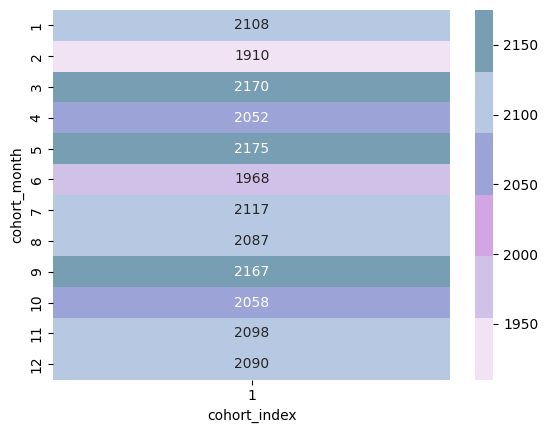

In [64]:
cohort_table=cohort_data.pivot(index='cohort_month',columns='cohort_index',values='customer_id')
sns.heatmap(cohort_table,cmap=color_list,annot=True,fmt='.0f')
plt.show()

# Customer Segmentation

In [65]:
rfm = df.groupby('customer_id').agg(
    Recency=('order_date', lambda x: (pd.to_datetime('today') - x.max()).days),
    Frequency=('order_id', 'count'),
    Monetary=('final_price', 'sum')
)

In [66]:
rfm.head(3)

,Recency,Frequency,Monetary
customer_id,,,
0000A5486A60,72,1,565.98
000128A482A9,239,1,343.10
0006310A3377,173,1,203.02


In [67]:
rfm['recency_rank']=pd.qcut(rfm['Recency'],q=4,labels=[4,3,2,1]).astype(int)
rfm['monetary_rank']=pd.qcut(rfm['Monetary'],q=4,labels=[1,2,3,4]).astype(int)

In [68]:
rfm['RFM_score']=rfm['recency_rank']+rfm['monetary_rank']

In [69]:
display(rfm.sort_values('RFM_score',ascending=False).head(4))
display(rfm.sort_values('RFM_score',ascending=False).tail(4))

,Recency,Frequency,Monetary,recency_rank,monetary_rank,RFM_score
customer_id,,,,,,
933542A09487,80,1,599.10,4,4,8
140892468433,54,1,472.43,4,4,8
933763241937,90,1,771.47,4,4,8
33852078A498,69,1,680.03,4,4,8


,Recency,Frequency,Monetary,recency_rank,monetary_rank,RFM_score
customer_id,,,,,,
A31668A36A42,328,1,103.09,1,1,2
347587069306,339,1,52.92,1,1,2
592A88180245,390,1,7.70,1,1,2
346A33658894,391,1,74.11,1,1,2


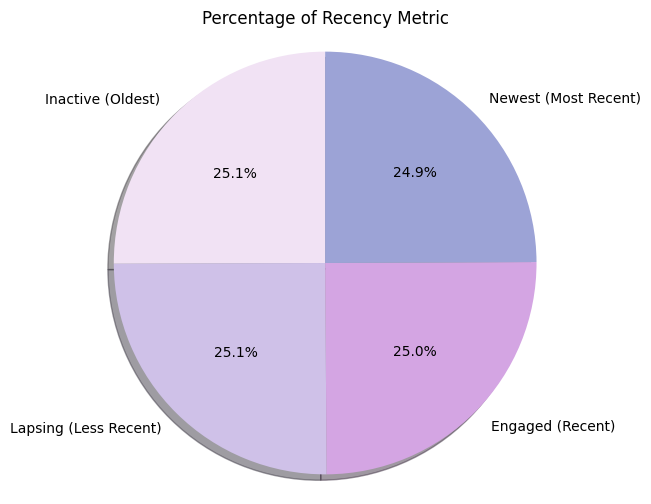

In [70]:
recency_counts = rfm['recency_rank'].value_counts()
labels = [
    'Inactive (Oldest)',
    'Lapsing (Less Recent)',
    'Engaged (Recent)',
    'Newest (Most Recent)'
]

plt.figure(figsize=(6, 6))
plt.pie(
    recency_counts,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,
    colors=color_list,
    shadow=True
)
plt.title('Percentage of Recency Metric')
plt.axis('equal')
plt.show()

In [71]:
# RFM_score
valuedcustomer_counts = rfm['RFM_score'].value_counts()
labels_rfm=["Lost Customers","Hibernating","At Risk","Recent Low-Spenders","Promising","Loyal Customers","Premium Customers"]

In [72]:
valuedcustomer_counts

,count
RFM_score,
5,6295
6,4709
4,4542
3,3189
7,3136
2,1566
8,1563


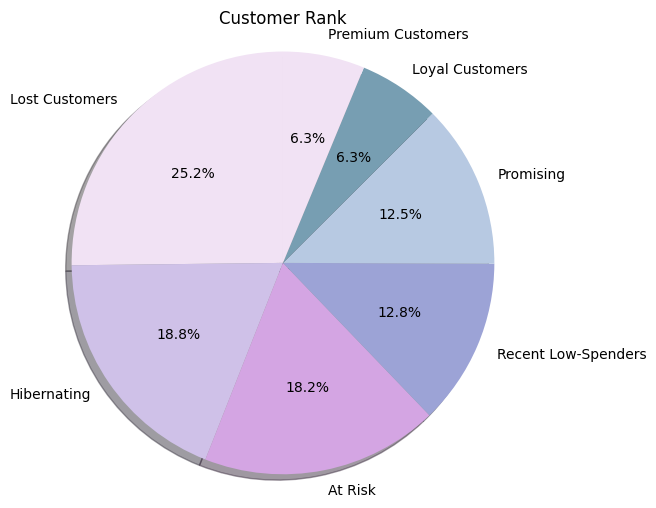

In [73]:
plt.figure(figsize=(6, 6))
plt.pie(
    valuedcustomer_counts,
    labels=labels_rfm,
    autopct='%1.1f%%',  # Show percentages
    startangle=90,
    colors=color_list,
    shadow=True
)
plt.title('Customer Rank')
plt.axis('equal')
plt.show()

# Price Elasticity Estimation

Approximate sensitivity of quantity sold to price/discount changes.

In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
df_elasticity=df[['product_name','unit_price','quantity','final_price','discount_percent']]

In [75]:
product_name = df_elasticity['product_name'].iloc[0]
df_p1 = df_elasticity[df_elasticity['product_name'] == product_name].copy()
product_name2 = df_elasticity['product_name'].iloc[1]
df_p2 = df_elasticity[df_elasticity['product_name'] == product_name].copy()
product_name3 = df_elasticity['product_name'].iloc[2]
df_p3 = df_elasticity[df_elasticity['product_name'] == product_name].copy()

In [76]:
lm1=smf.ols('np.log(quantity)~np.log(unit_price)',data=df_p1).fit()
lm2=smf.ols('np.log(quantity)~np.log(unit_price)',data=df_p2).fit()
lm3=smf.ols('np.log(quantity)~np.log(unit_price)',data=df_p3).fit()
display(lm1.summary())
display(lm2.summary())
display(lm3.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(quantity)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3719
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.543
Time:                        07:13:48   Log-Likelihood:                -160.84
No. Observations:                 251   AIC:                             325.7
Df Residuals:                     249   BIC:                             332.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7019      0.178      3.935      0.000       0.351       1.053
np.log(unit_price)    -0.0231      0.038     -0.610      0.543      -0.098       0.051
==============================================================================
Omnibus:                     2810.443   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.063
Skew:                          -0.280   Prob(JB):                     8.06e-07
Kurtosis:                       1.460   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(quantity)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3719
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.543
Time:                        07:13:48   Log-Likelihood:                -160.84
No. Observations:                 251   AIC:                             325.7
Df Residuals:                     249   BIC:                             332.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7019      0.178      3.935      0.000       0.351       1.053
np.log(unit_price)    -0.0231      0.038     -0.610      0.543      -0.098       0.051
==============================================================================
Omnibus:                     2810.443   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.063
Skew:                          -0.280   Prob(JB):                     8.06e-07
Kurtosis:                       1.460   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(quantity)   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3719
Date:                Mon, 11 Aug 2025   Prob (F-statistic):              0.543
Time:                        07:13:48   Log-Likelihood:                -160.84
No. Observations:                 251   AIC:                             325.7
Df Residuals:                     249   BIC:                             332.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7019      0.178      3.935      0.000       0.351       1.053
np.log(unit_price)    -0.0231      0.038     -0.610      0.543      -0.098       0.051
==============================================================================
Omnibus:                     2810.443   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.063
Skew:                          -0.280   Prob(JB):                     8.06e-07
Kurtosis:                       1.460   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Elasticity ≈ -0.023: A 1% price increase reduces demand by 0.023% (negligible).


In [77]:
from sklearn.linear_model import LinearRegression
elasticity_results = []

# Loop through each product
for product, group in df.groupby('product_name'):
    X = group[['discount_percent', 'price']]
    y = group['quantity']

    # Skip if not enough data
    if len(group) < 2:
        continue

    model = LinearRegression().fit(X, y)

    # Calculate elasticity for discount_percent
    elasticity_discount = model.coef_[0] * (X['discount_percent'].mean() / y.mean())
    # Calculate elasticity for price
    elasticity_price = model.coef_[1] * (X['price'].mean() / y.mean())

    elasticity_results.append({
        'product_name': product,
        'elasticity_discount': elasticity_discount,
        'elasticity_price': elasticity_price
    })

# Convert to DataFrame
elasticity_df = pd.DataFrame(elasticity_results)



In [78]:
print(elasticity_df.head(25))

         product_name  elasticity_discount  elasticity_price
0         Adidas Caps             0.046696          0.013697
1      Adidas Jackets             0.087027         -0.013236
2        Adidas Jeans            -0.024966         -0.041861
3       Adidas Shirts            -0.015198          0.017872
4        Adidas Shoes             0.048416         -0.031589
5       Adidas Shorts             0.029700         -0.026673
6     Adidas Sneakers            -0.018843          0.047315
7     Adidas Sweaters             0.066522         -0.081693
8     Adidas T-Shirts            -0.026484          0.059197
9      Adidas Watches             0.024289          0.054613
10  Carter's Blankets             0.020959         -0.045588
11   Carter's Booties             0.007063         -0.113664
12      Carter's Caps            -0.044064          0.068854
13      Carter's Hats            -0.085834          0.049368
14   Carter's Onesies             0.045911         -0.041168
15   Carter's Rompers   

 Adidas Jackets (0.087) and Coach Tops (0.086) respond well to discounts, so promotions may significantly boost sales. Negative values (e.g., Carter’s Hats −0.086) suggest that discounts might not be attracting demand—possibly due to brand positioning or customer perception.

Many Adidas items (e.g., Adidas Jeans −0.042, Adidas Sweaters −0.082) show expected negative price elasticity — higher prices reduce demand. Some items, like Coach Sandals (0.076) and Adidas T-Shirts (0.059), have positive price elasticity, which can occur in premium/luxury segments where higher prices signal quality.

# Return Prediction

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import __version__ as sklearn_version
from packaging import version

if version.parse(sklearn_version) >= version.parse("1.2"):
    encoder = OneHotEncoder(drop='first', sparse_output=False)
else:
    encoder = OneHotEncoder(drop='first', sparse=False)

features = ['discount_percent', 'quantity', 'delivery_days',
            'main_category', 'brand', 'customer_age_group', 'device_type']

X = df[features]
y = df['is_returned']

# --- Encode categorical variables ---
categorical_cols = X.select_dtypes(include=['object']).columns
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

X_final = pd.concat([X.drop(categorical_cols, axis=1).reset_index(drop=True),
                     X_encoded.reset_index(drop=True)], axis=1)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# --- Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

# --- Decision Tree ---
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))

# --- Feature Importance (Decision Tree) ---
importances = pd.Series(tree_model.feature_importances_, index=X_final.columns)
importances = importances.sort_values(ascending=False)
coef_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)



Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4474
           1       0.00      0.00      0.00       526

    accuracy                           0.89      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.80      0.89      0.85      5000

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4474
           1       0.00      0.00      0.00       526

    accuracy                           0.89      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.80      0.89      0.85      5000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

/tmp/ipython-input-3577507535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_plot, y=importance_plot.index, palette=color_list)
/tmp/ipython-input-3577507535.py:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=importance_plot, y=importance_plot.index, palette=color_list)


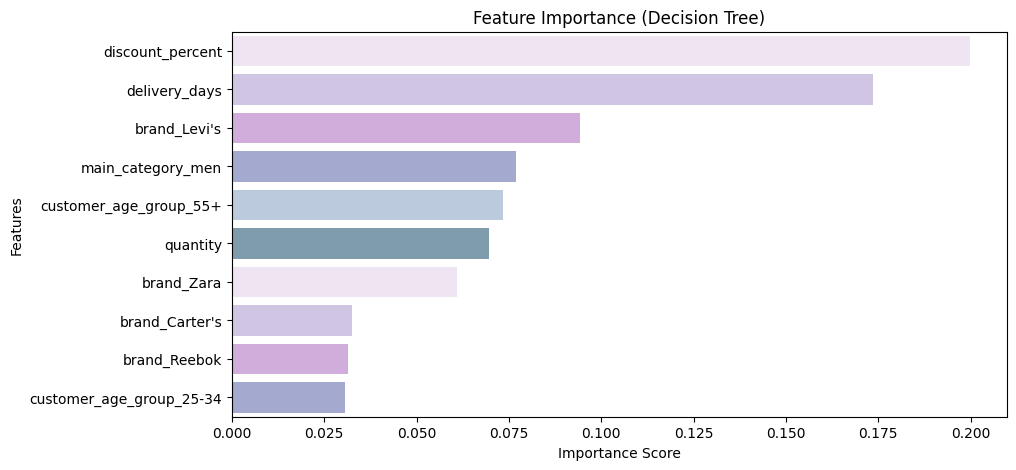

In [80]:
plt.figure(figsize=(10,5))
importance_plot=importances.head(10)
sns.barplot(x=importance_plot, y=importance_plot.index, palette=color_list)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

/tmp/ipython-input-1713441265.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette=color_list)
/tmp/ipython-input-1713441265.py:2: UserWarning: 
The palette list has fewer values (6) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette=color_list)


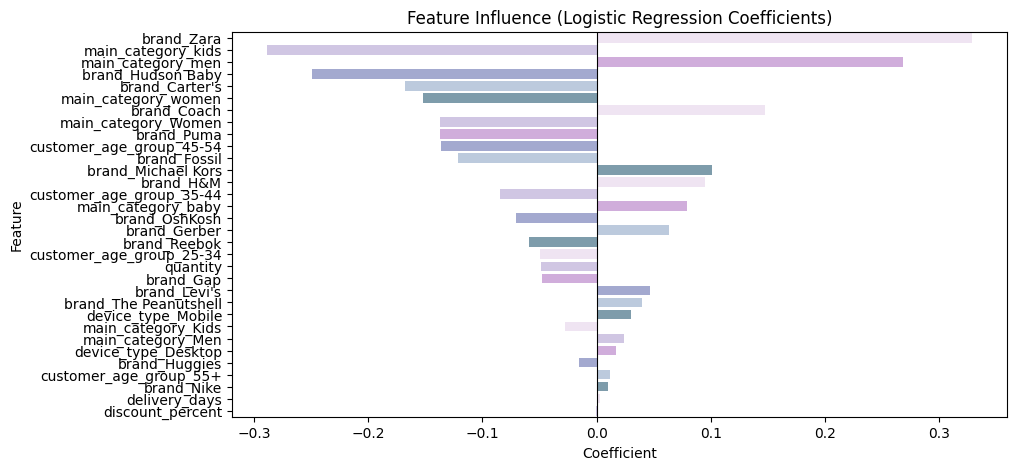

In [81]:
plt.figure(figsize=(10,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette=color_list)
plt.title("Feature Influence (Logistic Regression Coefficients)")
plt.axvline(0, color='black', linewidth=0.8)
plt.show()

In [82]:
importances.head(10)

,0
discount_percent,0.199815
delivery_days,0.173669
brand_Levi's,0.094331
main_category_men,0.076876
customer_age_group_55+,0.073415
quantity,0.069467
brand_Zara,0.060835
brand_Carter's,0.032476
brand_Reebok,0.031517
customer_age_group_25-34,0.030583


Discount_percent (0.1998) and delivery_days (0.1737) are the top predictors of whether an order is returned.This means orders with higher discounts or longer delivery times are more strongly associated with return likelihood.

Levi’s (0.0943), Zara (0.0608), Carter’s (0.0325), Reebok (0.0315), Gap (0.0223), and Hudson Baby (0.0222) suggest that certain brands have a measurable return pattern. Positive importance doesn’t mean they cause returns; it means the model finds brand identity useful in differentiating return vs. no-return orders.

Age group 55+ (0.0734), 25–34 (0.0306), and 35–44 (0.0284) contribute to prediction, meaning certain age groups may return products more or less often.
This could reflect differences in product fit, expectations, or shopping habits.

Desktop users (0.0302) have distinct return patterns compared to mobile/tablet shoppers.Could indicate browsing style differences — desktop buyers may spend more time comparing or ordering higher-priced items.

Men (0.0769), Kids (0.0221), and Women (0.0194) categories influence return probability, possibly due to fit issues (e.g., men’s sizes vs. women’s fashion trends vs. kids’ growth).

# Anomaly Detection

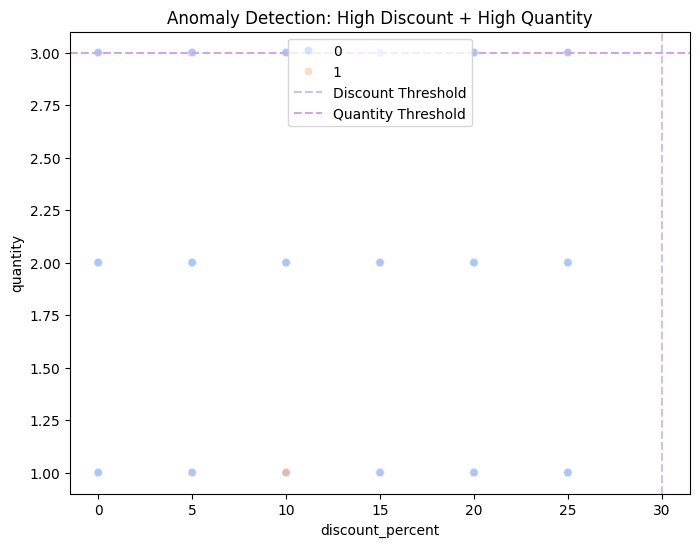

In [100]:
qty_threshold = df['quantity'].quantile(0.90)
disc_threshold = 30

# Rule 1 anomalies
anomaly_rule1 = df[(df['discount_percent'] > disc_threshold) & (df['quantity'] > qty_threshold)]

# Rule 2 anomalies
anomaly_rule2 = df[(df['is_returned'] == 1) & (df['delivery_days'] < 2)]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='discount_percent', y='quantity', hue='is_returned', alpha=0.5,palette='coolwarm')

# Highlight anomalies
sns.scatterplot(data=anomaly_rule1, x='discount_percent', y='quantity',
                color=color_list[4], marker='X', s=100, label='Anomaly Rule 1')

# Threshold lines
plt.axvline(x=disc_threshold, color=color_list[1], linestyle='--', label='Discount Threshold')
plt.axhline(y=qty_threshold, color=color_list[2], linestyle='--', label='Quantity Threshold')

plt.title("Anomaly Detection: High Discount + High Quantity")
plt.legend()
plt.show()



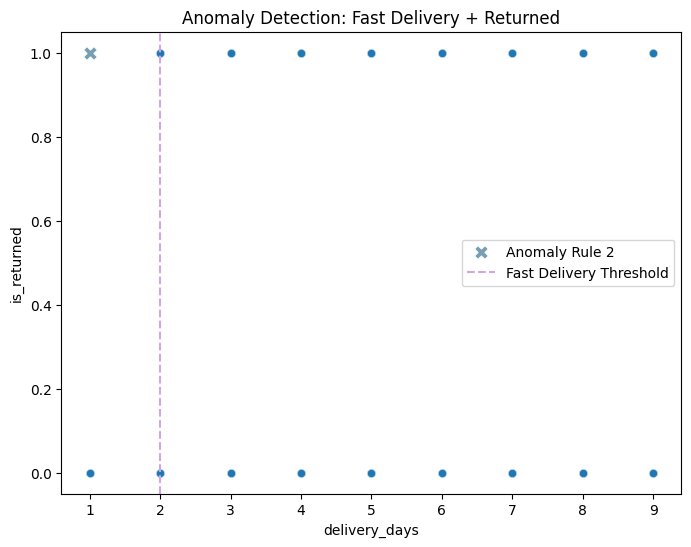

In [103]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='delivery_days', y='is_returned', alpha=0.5)

sns.scatterplot(data=anomaly_rule2, x='delivery_days', y='is_returned',
                 marker='X', s=100, label='Anomaly Rule 2',color=color_list[5])

plt.axvline(x=2, color=color_list[2], linestyle='--', label='Fast Delivery Threshold')
plt.title("Anomaly Detection: Fast Delivery + Returned")
plt.legend()
plt.show()

# Time-to-Delivery Hotspots

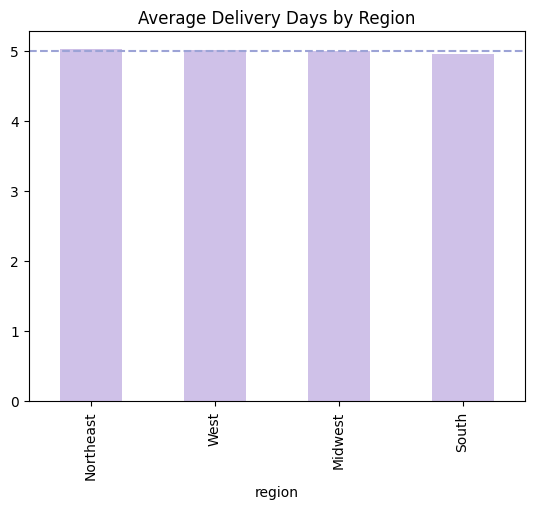

In [107]:
delivery_hotspots = df.groupby('region')['delivery_days'].mean().sort_values(ascending=False)
delivery_hotspots.plot(kind='bar', title='Average Delivery Days by Region',color=color_list[1])
plt.axhline(y=df['delivery_days'].mean(), linestyle='--', label='Global Average',color=color_list[3])